# Exercise 1: Analyzing the Boston Marathon

![title](bm_logo.jpeg)

## 1.1 Overview

In this exercise we are going to
1. Scrape results of the Boston Marathon
2. Plot the data
3. Analyze the results and identify performance benchmarks

## 1.2 Import Libraries

Typically there are 3 standard python libraries used for almost any data science task.
- **numpy**: numpy is a popular python numerical computing library. It supports large multi-dimensional arrays and matrices and also provides a large number of numerical functions that can operate on these arrays. If you have experience with Matlab then numpy will feel familiar to you.
- **pandas**: pandas is a python library that is very helpful for data manipulation and analysis. The data structures employed using pandas enable rapid processing of data tables and time series. You can think of pandas as providing MS Excel-like functionality in python.
- **matplotlib**: matplotlib is a plotting library in python that was designed to support numpy outputs. In particular, pyplot is a module of matplotlib that closely resembles the plotting features of Matlab. matplotlib also has several toolkits attached to it that extend functionality for more complext plotting. There are also a few numerical functions included in matplotlib that you may occasionally use.

In [1]:
%matplotlib inline
# Basic data science libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1.3 Grab Data

For this exercise we are going to use results data from recent Boston Marathons. Our first step will be to grab the data and put it into a pandas DataFrame. We are going to pull the data from http://boston.r.mikatiming.de/2017. Here is what the data looks like in a web browser

![title](BM_screenshot.png)

 To scrape this data off the web we will use the requests and beautiful soup libraries in python.

In [2]:
# web-scraping libraries
import requests
from bs4 import BeautifulSoup

Lets pull data from the 2017 race for males.

In [3]:
# set search parameters
year = 2017
gender = 'M'

A closer look at the web url provides clues on how to scrape. Here is the url if I click to the second page of results.

![title](BM_screenshot2.png)

We will want to grab first 10,000 results. If you look at the link above you will notice that results are posted to the web-page in 1,000 increments. So, we'll need to go through 10 pages of results.

Lets also put this process in a python function so we can re-use it as needed in our analysis

In [4]:
def scrape_bostonresults(year, gender):
    """
    Pulls Boston Marathon
    results for year specified
    Returns data in a pandas DataFrame
    """
    out_data = []
    for ii in np.arange(1, 10):
        # create url
        base_url = "http://boston.r.mikatiming.de/%i/?page=%i" % (year, ii)
        post_url = "&event=R&num_results=1000&pid=list&search%5Bsex%5D"
        gender_url = "=%s" % gender
        url = base_url + post_url + gender_url

        # pull web-site data
        r = requests.get(url)
        # soupify site data
        soup = BeautifulSoup(r.text)
        # all results are in html table with tag <tr>
        sub_data = soup.findAll(name="tr")

        # 1000 results per page
        # first row is table header
        # so skip it
        for jj in np.arange(1, 1001):
            try:
                # row of data
                result = sub_data[jj]
                # data is delimited by the \n character
                split_result = result.text.split('\n')
                # overall finish spot
                overall = int(split_result[1])
                # gender finish spot
                gender = int(split_result[2])
                # age division finish spot
                division = int(split_result[3])
                # racers name
                name = split_result[4][2:]
                # half split in string format
                half = split_result[6]
                # full split in string format
                full = split_result[8]
                # convert half split to mins
                half_mins = int(half[0:2]) * 60 + int(half[3:5]) + int(half[6:8]) / 60.
                # convert full race time to mins
                full_mins = int(full[0:2]) * 60 + int(full[3:5]) + int(full[6:8]) / 60.
                # compute second half split
                half2_mins = full_mins - half_mins
                # "split" time in minutes
                race_split = half2_mins - half_mins
                out_data.append((overall, gender, division, name, half, full, half_mins, full_mins, half2_mins, race_split))
            except ValueError:
                # there are a few bad rows
                # not many so just ignore and
                # alert the user
                print 'Bad row'
        # Output statement
        print 'Through year %i and page %i' % (year, ii)
    df = pd.DataFrame(data=out_data, columns=(('overall', 'gender', 'division', 'name', 'half', 'full', 'half_mins', 'full_mins', 'second_half_mins', 'race_split')))
    return df

Lets pull the data and look at the output

In [6]:
df = scrape_bostonresults(year, gender)
df.head(10)

Through year 2017 and page 1
Bad row
Through year 2017 and page 2
Through year 2017 and page 3
Through year 2017 and page 4
Bad row
Bad row
Through year 2017 and page 5
Through year 2017 and page 6
Through year 2017 and page 7
Bad row
Through year 2017 and page 8
Through year 2017 and page 9


,overall,gender,division,name,half,full,half_mins,full_mins,second_half_mins,race_split
0,1,1,1,"Kirui, Geoffrey (KEN)",01:04:35,02:09:37,64.583333,129.616667,65.033333,0.450000
1,2,2,2,"Rupp, Galen (USA)",01:04:35,02:09:58,64.583333,129.966667,65.383333,0.800000
2,3,3,3,"Osako, Suguru (JPN)",01:04:36,02:10:28,64.600000,130.466667,65.866667,1.266667
3,4,4,4,"Biwott, Shadrack (USA)",01:04:45,02:12:08,64.750000,132.133333,67.383333,2.633333
4,5,5,5,"Chebet, Wilson (KEN)",01:04:35,02:12:35,64.583333,132.583333,68.000000,3.416667
5,6,6,1,"Abdirahman, Abdi (USA)",01:04:35,02:12:45,64.583333,132.750000,68.166667,3.583333
6,7,7,6,"Maiyo, Augustus (USA)",01:04:36,02:13:16,64.600000,133.266667,68.666667,4.066667
7,8,8,7,"Sefir, Dino (ETH)",01:06:04,02:14:26,66.066667,134.433333,68.366667,2.300000
8,9,9,8,"Puskedra, Luke (USA)",01:04:53,02:14:45,64.883333,134.750000,69.866667,4.983333
9,10,10,9,"Ward, Jared (USA)",01:04:53,02:15:28,64.883333,135.466667,70.583333,5.700000


## 1.4 Data Science Studies

### 1.4.1 Fastest Names

One important job function of a data scientist is the ability to summarize large datasets into interesting results for an audience.

In this example we will mine the 2017 Boston Marathon results to identify the fastest "teams", grouped by names. Let's define a team as three individuals with the same first name and we want to see rankings/results of the fastest teams.

To start we note that the "name" column contains both names of the runner. We need to isolate the first name of each result so we can group and compile by that value. Since each name follows a pattern of "LASTNAME, FIRSTNAME (COUNTRY ABBREV)" we can use python to take advantage of that pattern and pull out the individuals first name. We can split the character string by the comma and the remove the last 6 characters (i.e., the country abbreviation) and then isolate the runners first name. We'll store that value in the DataFrame

In [7]:
df['first_names'] = [row[1]['name'].split(',')[1][:-6] for row in df.iterrows()]
df.head(10)

,overall,gender,division,name,half,full,half_mins,full_mins,second_half_mins,race_split,first_names
0,1,1,1,"Kirui, Geoffrey (KEN)",01:04:35,02:09:37,64.583333,129.616667,65.033333,0.450000,Geoffrey
1,2,2,2,"Rupp, Galen (USA)",01:04:35,02:09:58,64.583333,129.966667,65.383333,0.800000,Galen
2,3,3,3,"Osako, Suguru (JPN)",01:04:36,02:10:28,64.600000,130.466667,65.866667,1.266667,Suguru
3,4,4,4,"Biwott, Shadrack (USA)",01:04:45,02:12:08,64.750000,132.133333,67.383333,2.633333,Shadrack
4,5,5,5,"Chebet, Wilson (KEN)",01:04:35,02:12:35,64.583333,132.583333,68.000000,3.416667,Wilson
5,6,6,1,"Abdirahman, Abdi (USA)",01:04:35,02:12:45,64.583333,132.750000,68.166667,3.583333,Abdi
6,7,7,6,"Maiyo, Augustus (USA)",01:04:36,02:13:16,64.600000,133.266667,68.666667,4.066667,Augustus
7,8,8,7,"Sefir, Dino (ETH)",01:06:04,02:14:26,66.066667,134.433333,68.366667,2.300000,Dino
8,9,9,8,"Puskedra, Luke (USA)",01:04:53,02:14:45,64.883333,134.750000,69.866667,4.983333,Luke
9,10,10,9,"Ward, Jared (USA)",01:04:53,02:15:28,64.883333,135.466667,70.583333,5.700000,Jared


Next we can initialize a dictionary where we'll store the team performances. "teams" will be a python dictionary indexed by first name (i.e., the team name) we'll store two floats in the values entry. The first will be a count of how many members are already on the team, and the second will be their cumulative finishing time.

In [8]:
teams ={}

We can take advantage of the dataset being ordered by fastest runners and loop through each row. For each row we will check to see if the team (remember, team membership is governed by first name) already has filled up with three fast runners. If not, we will add the runners time to the team. Else, we will move on to the next row.

In [9]:
# loop through each row in the DataFrame
for row in df.iterrows():
    # get the first name
    first_name = row[1]['first_names']
    # get the finishing time
    time_min = row[1]['full_mins']
    # has a team been created for this name?
    if teams.get(first_name):
        # get the number of members already on this team
        # based on scoring rules we only want
        # the first three finishers to count toward the 
        # team results
        team_ct = teams.get(first_name)[0]
        # are their already three finishers on the team?
        if team_ct < 3:
            # add this runners result to the team
            teams[first_name][0] += 1
            teams[first_name][1] += time_min
    else:
        # this runner is the first finisher of his name
        # so create a team for his name
        teams[first_name] = [1, time_min]

The python dictionary "teams" has some teams that did not have three finishers in it. Let's go through teams, check to make sure their are 3 members and convert the data to a python list (and then to a pandas dataframe)

In [10]:
competing_teams = []
# loop through each element in the dictionary
for k in teams.keys():
    # did the team have 3 finishers?
    if teams[k][0] == 3:
        # put the data in a list
        competing_teams.append((k, teams[k][0], teams[k][1]))
# convert the data to pandas dataframe
df_firstNameTeams = pd.DataFrame(data=competing_teams, columns=(('Name', 'Count', 'Time')))
df_firstNameTeams.head(10)

,Name,Count,Time
0,Xiaodong,3,623.266667
1,Fernando,3,536.083333
2,Dean,3,603.533333
3,Felix,3,536.366667
4,George,3,540.800000
5,Simon,3,543.483333
6,Douglas,3,504.383333
7,Alex,3,502.116667
8,Jocelyn,3,681.516667
9,Sebastien,3,509.383333


We are almost finished. The last step is to sort the DataFrame by the cumulative time.

In [11]:
df_firstNameTeams.sort_values(by='Time').head(20)

,Name,Count,Time
408,Luke,3,442.866667
133,Sean,3,445.450000
74,Christopher,3,447.333333
362,Eric,3,448.183333
346,Matthew,3,452.266667
81,Ryan,3,456.883333
262,Brian,3,457.016667
353,Scott,3,458.783333
369,David,3,458.916667
398,Michael,3,459.350000


As shown above, the fastest first-name teams were Luke, Sean and Christopher. Incredibly, the top 3 runners named Luke averaged 147 minutes apiece, or 2 hours and 27 minutes to finish the marathon!

### 1.4.2 Predicting Finishing Time Based on First Half Performance

Shifting gears we are interested in creating a model that predicts finishing time of runners based on their first half race performance.

We will try a linear regression fit on the data. Linear regression fits a linear model to a set of features that map onto a real value. 

For our first example we have exactly one feature, the runners half race time. We can start by visualizing the data

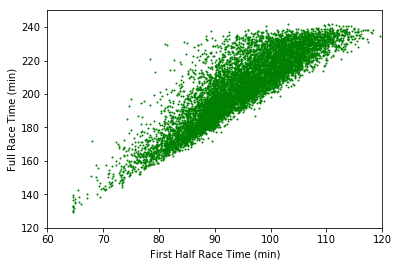

In [41]:
half_times = df['half_mins'].values
full_times = df['full_mins'].values
plt.scatter(half_times, full_times, s=1, color='g')
plt.xlabel('First Half Race Time (min)')
plt.ylabel('Full Race Time (min)')
plt.xlim(60, 120)
plt.ylim(120, 250)
plt.show()

Linear regression is the construction of a linear model. In our case we are building the function $f$ which is dependent on the independent variable $x$, the runners first half race time. The function is linear, i.e., 
$$ f(x) = mx + b$$
For each runner we have the feature $x_i$ and result $y_i$. So, for a given $m$ and $b$ our model residual will be

\begin{align}
y_1 & = & m x_1 + b \\
y_2 & = & m x_2 + b \\
... & & \\
y_n & = & m x_n + b \\
\end{align}

In matrix form this set of equations looks like
\begin{equation}
\left(
    \begin{array}{c}
        y_1 \\
        y_2 \\
        ... \\
        y_n \\
    \end{array}
\right) = 
\left(
    \begin{array}{cc}
        1 & x_1 \\
        1 & x_2 \\
        ... & \\
        1 & x_n \\
     \end{array}
\right)
\left(
    \begin{array}{c}
        b \\
        m \\
    \end{array}
\right)
\end{equation}

If we left-multiply both sides of the equation by the transpose of the data matrix (e.g., the matrix containing the values $x_i$ values) we have

\begin{equation}
\left(
    \begin{array}{cc}
        1 & x_1 \\
        1 & x_2 \\
        ... & \\
        1 & x_n \\
     \end{array}
\right)^T
\left(
    \begin{array}{c}
        y_1 \\
        y_2 \\
        ... \\
        y_n \\
    \end{array}
\right) = 
\left(
    \begin{array}{cc}
        1 & x_1 \\
        1 & x_2 \\
        ... & \\
        1 & x_n \\
     \end{array}
\right)^T
\left(
    \begin{array}{cc}
        1 & x_1 \\
        1 & x_2 \\
        ... & \\
        1 & x_n \\
     \end{array}
\right)
\left(
    \begin{array}{c}
        b \\
        m \\
    \end{array}
\right)
\end{equation}

The matrix on the right-hand side of the equation is square since it is the product of two matrices, the first being 2 x $n$ and the second being $n$ x 2. As long as the rank of the original data matrix is 2, the matrix created by multiplying itself by it's transpose is invertible and we can left-multiply both sides of the equation by the inverse of the matrix on the right-hand side of the equation. The result is

\begin{equation}
\left(
\left(
    \begin{array}{cc}
        1 & x_1 \\
        1 & x_2 \\
        ... & \\
        1 & x_n \\
     \end{array}
\right)^T
\left(
    \begin{array}{cc}
        1 & x_1 \\
        1 & x_2 \\
        ... & \\
        1 & x_n \\
     \end{array}
\right)
\right)^{-1}
\left(
    \begin{array}{cc}
        1 & x_1 \\
        1 & x_2 \\
        ... & \\
        1 & x_n \\
     \end{array}
\right)^T
\left(
    \begin{array}{c}
        y_1 \\
        y_2 \\
        ... \\
        y_n \\
    \end{array}
\right) = 
\left(
    \begin{array}{c}
        b \\
        m \\
    \end{array}
\right)
\end{equation}

and we have a closed expression to compute the regression variables $b$ and $m$. This method is also referred to as ordinary least squares, since it can also be derived as a method to minimize the least-squares residual of a linear model passing through the data.

In python there are already libraries with linear regression equations coded. For this example we will use a popular library with data scientists, sci-kit learn.

In [19]:
from sklearn import linear_model

It's very easy in sklearn to instantiate a model

In [20]:
regression_model = linear_model.LinearRegression()

We prepare the data to train the model. sklearn wants the data in numpy arrays (without the 1's that are shown in the derivation above) so we repackage the data to support sklearn and then fit the model to the data.

In [45]:
training_features = np.array([half_times]).transpose()
training_response = np.array([full_times]).transpose()
regression_model.fit(training_features, training_response)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

We can now look at the model to see it's fit outputs

In [46]:
print('Coefficients: \n', regression_model.coef_)

('Coefficients: \n', array([[ 2.08551625]]))


The coefficient of the model is 2.0855. Since the feature we trained on was the time it took the runners to make it half way through the course we aren't surprised that the value is around 2.

In [47]:
print('Coefficients: \n', regression_model.intercept_)

('Coefficients: \n', array([ 6.70358738]))


For completeness we can also output the intercept value of the model (i.e., the value of $b$)

Lastly, we can overlay our model on the data as a visualization of the results

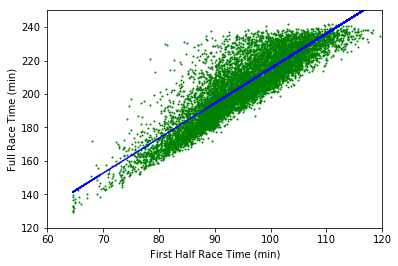

In [48]:
plt.scatter(half_times, full_times, s=1, color='g')
plt.plot(np.array([half_times]).transpose(),
         regression_model.predict(np.array([half_times]).transpose()),
         color='blue',
         linewidth=1.5)
plt.xlabel('First Half Race Time (min)')
plt.ylabel('Full Race Time (min)')
plt.xlim(60, 120)
plt.ylim(120, 250)
plt.show()